In [1]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#Around100M+ ratings 4499 movies 480,000+ users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Copy of combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [5]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:

# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [7]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [8]:

netflix_dataset.shape

(24058263, 2)

In [9]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]

In [10]:
movie_count

4499

In [11]:
movie_count

4499

In [13]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [14]:
customer_count

475257

In [15]:
#without NaN values
customer_count=customer_count-movie_count
customer_count

470758

In [16]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [17]:
# netflix_dataset['Rating'].count()


In [18]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [19]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


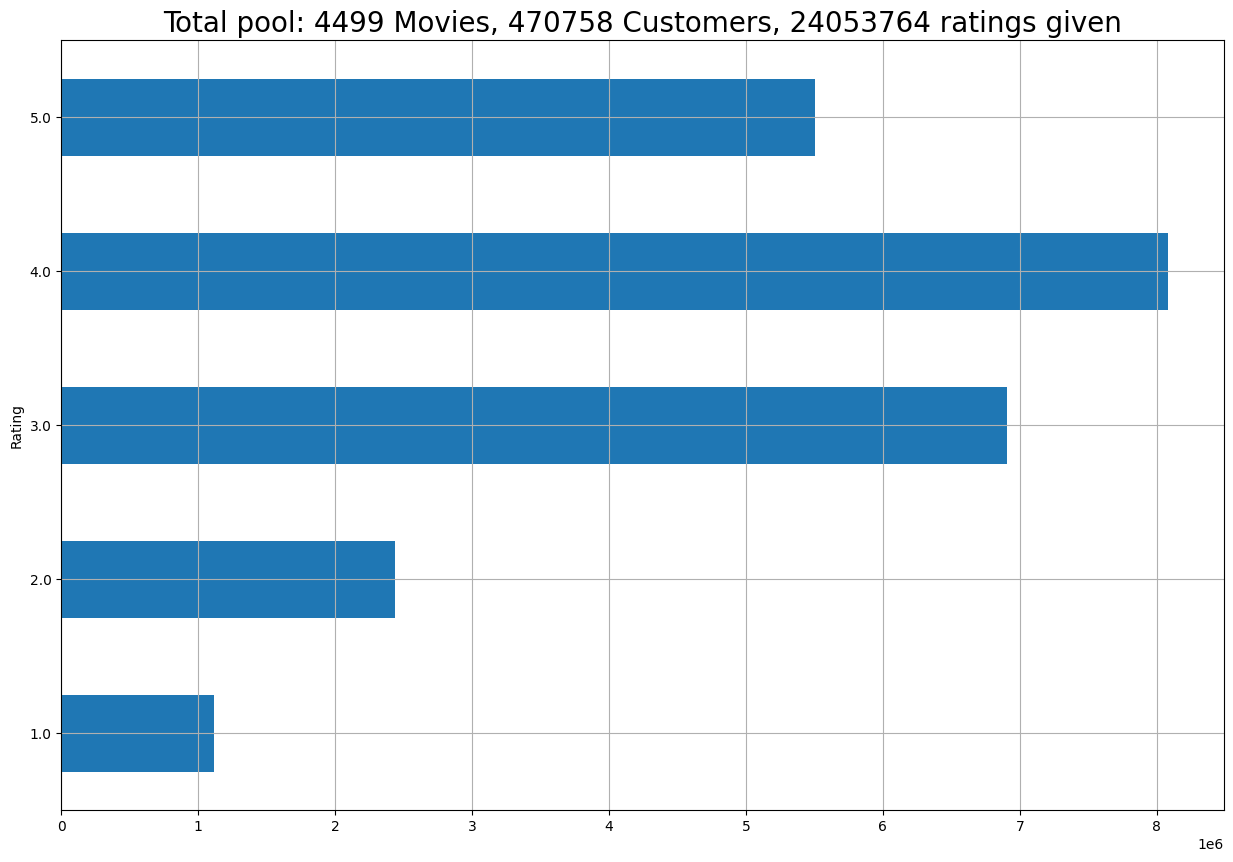

In [20]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [21]:
ax = px.bar(stars, orientation='h')
ax.update_layout(title=f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given',
                 showlegend=False,
                 xaxis=dict(title='Count'),
                 yaxis=dict(title='Stars')
                 )
ax.show()

In [22]:
ax = px.bar(stars, orientation='h')
ax.update_layout(title=f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given',
                 showlegend=False,
                 xaxis=dict(title='Count'),
                 yaxis=dict(title='Stars')
                 )
ax.show()

In [23]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [24]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [25]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [26]:
df_nan.shape

(4499, 1)

In [27]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [28]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [29]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [30]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [31]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)

In [32]:
# len(netflix_dataset)

In [33]:
# df_nan.iloc[-1,0]

In [34]:
24053764-24057834

-4070

In [35]:
# 24053764-24057834-1

In [36]:
# netflix_dataset

In [37]:
# df_nan['index'][1:]


In [38]:
# df_nan['index'][:-1]

In [39]:
# df_nan.iloc[-1,0]-1

In [40]:
# len(netflix_dataset)

In [41]:
# # working
# x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [42]:
# tuple(x)

In [43]:
# temp=np.full((1,547), 1) #(shape, fill_value)

In [44]:
# print(temp)

In [45]:
# movie_np[-20:-1]

In [46]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]

netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [47]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [48]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
# f=['count','mean']

In [49]:
# dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [50]:
# dataset_movie_summary

In [51]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [52]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [53]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [54]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [55]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [56]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [57]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [58]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [59]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [60]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [61]:
netflix_dataset['Movie_Id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_Id, Length: 24053764, dtype: bool

In [62]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [63]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
import pandas as pd

In [66]:
df_title = pd.read_csv("/content/drive/MyDrive/Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [67]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [68]:
df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [69]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163014 sha256=982914abe05244f5fe1ae366fff0c4d9a10f53c09585aa86dc1b33411cfc1fe6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [70]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [71]:
#!pip install scikit-surprise

In [72]:
#help us to read the dataset for svd algo
reader=Reader()

In [73]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [74]:
data

In [75]:
model=SVD()
# cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

In [76]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([0.99186319, 0.99202294, 1.01015181, 0.99059035]),
 'test_mae': array([0.79228381, 0.79204995, 0.80347696, 0.79801749]),
 'fit_time': (2.5144577026367188,
  1.6429905891418457,
  1.690131664276123,
  1.7192697525024414),
 'test_time': (0.22769832611083984,
  0.14141035079956055,
  0.1326754093170166,
  0.13828444480895996)}

In [77]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [78]:
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)

In [79]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_1331154=netflix_dataset[(netflix_dataset['Cust_Id'] ==1331154)& (netflix_dataset['Rating']==5)]
# dataset_712664=dataset_712664.set_index('Movie_Id')
# dataset_712664=dataset_712664.join(df_title)['Name']
dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [80]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [81]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_1331154=df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [82]:
user_1331154=user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [83]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [84]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-84-701ece779a8c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.635476
7,8,2004.0,What the #$*! Do We Know!?,3.530121
15,16,1996.0,Screamers,3.534393
16,17,2005.0,7 Seconds,2.912606
17,18,1994.0,Immortal Beloved,3.757350
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.706401
17766,17767,2004.0,Fidel Castro: American Experience,3.706401
17767,17768,2000.0,Epoch,3.706401
17768,17769,2003.0,The Company,3.706401


In [86]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
print(user_1331154)

       Movie_Id    Year                        Name  Estimate_Score
27           28  2002.0             Lilo and Stitch        4.198886
29           30  2003.0      Something's Gotta Give        3.894329
17           18  1994.0            Immortal Beloved        3.757350
10459     10460  1988.0         Red Dwarf: Series 1        3.706401
12895     12896  1994.0       Bullets Over Broadway        3.706401
...         ...     ...                         ...             ...
2             3  1997.0                   Character        3.635476
15           16  1996.0                   Screamers        3.534393
7             8  2004.0  What the #$*! Do We Know!?        3.530121
25           26  2004.0             Never Die Alone        3.286102
16           17  2005.0                   7 Seconds        2.912606

[14621 rows x 4 columns]
